/content/train.csv
/content/test.csv
/content/sample_submission.csv
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/logs/2025.12.11/14.34.28.289959.log
/content/.config/logs/2025.12.11/14.34.22.298248.log
/content/.config/logs/2025.12.11/14.33.40.102128.log
/content/.config/logs/2025.12.11/14.34.12.303029.log
/content/.config/logs/2025.12.11/14.34.38.212031.log
/content/.config/logs/2025.12.11/14.34.39.029902.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.c

/tmp/ipython-input-1149568850.py:98: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['location'].fillna('unknown', inplace=True)
/tmp/ipython-input-1149568850.py:99: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

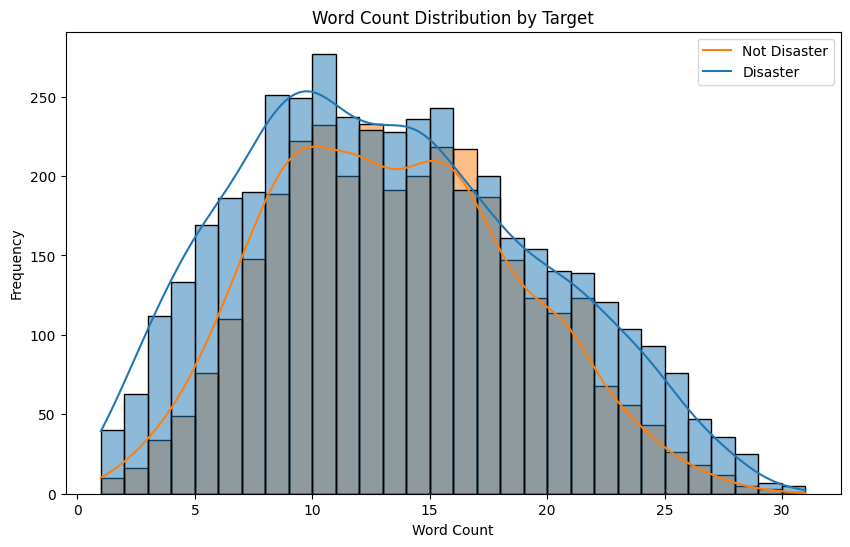

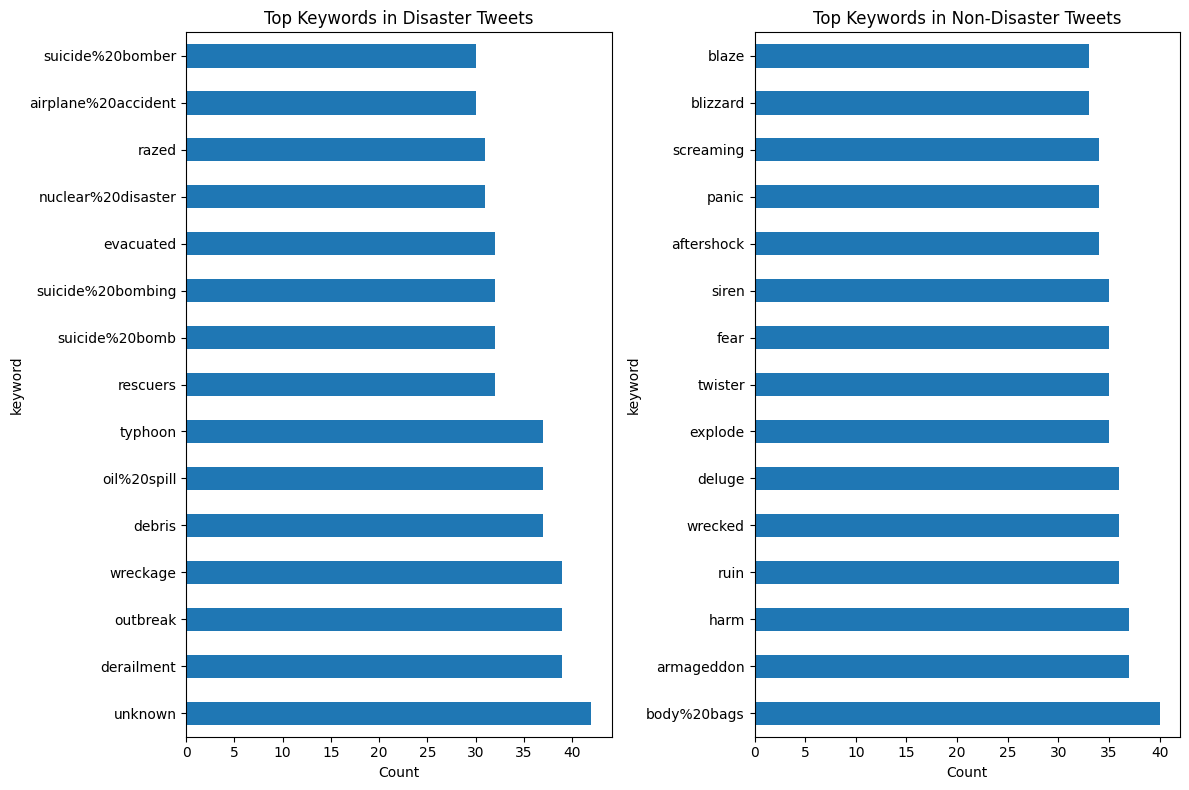


Cross-validation F1 scores: [0.5810163  0.50838926 0.60264901 0.57327189 0.68064516]
Mean F1 score: 0.5892

Submission file created successfully!

Top 20 most important features:
         Feature  Importance
718   california    2.953106
2177   hiroshima    2.903293
1774       fires    2.794922
2451      killed    2.660050
614      bombing    2.535602
4434       train    2.406624
4843    wildfire    2.358906
1758        fire    2.310153
1372  earthquake    2.270255
4219     suicide    2.269881
4171       storm    2.262982
2293          im    2.252971
2983        near    2.200152
2764    massacre    2.169799
1211  derailment    2.148020
2999         new    2.087582
1825      floods    2.077237
3379      police    2.045145
389       atomic    1.966592
676    buildings    1.956884


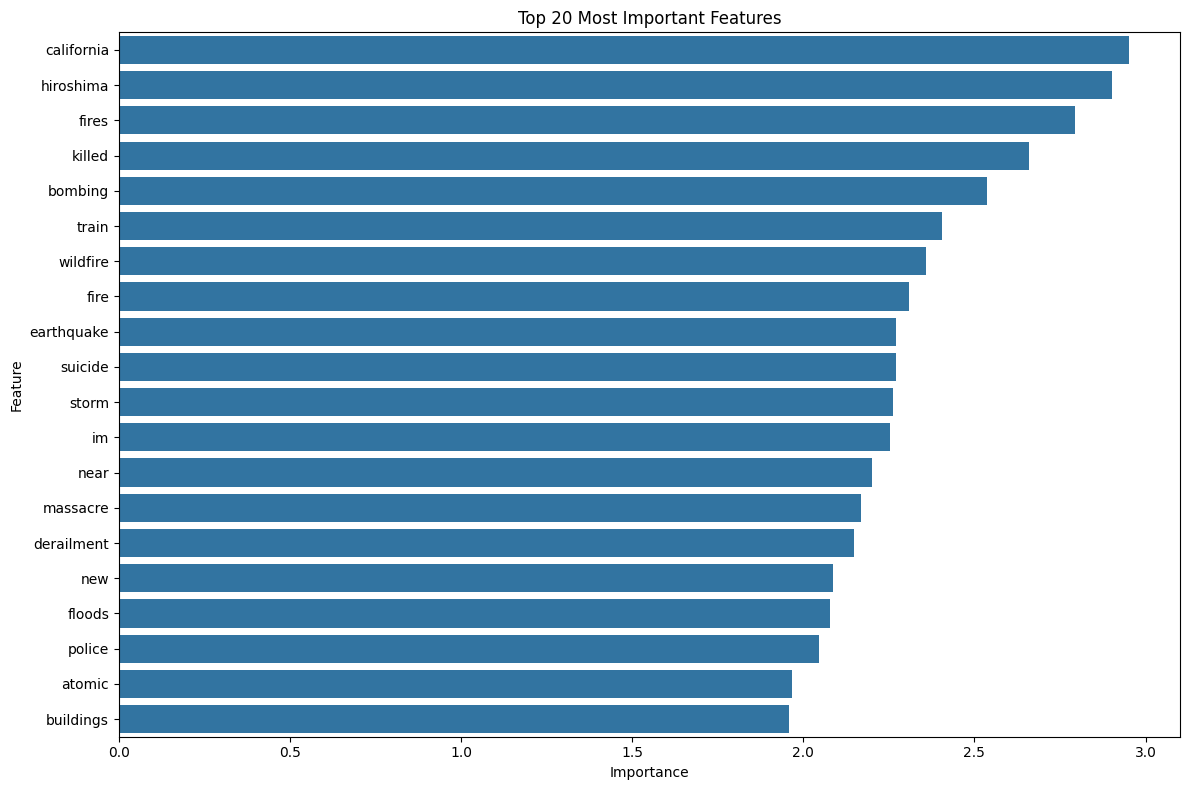

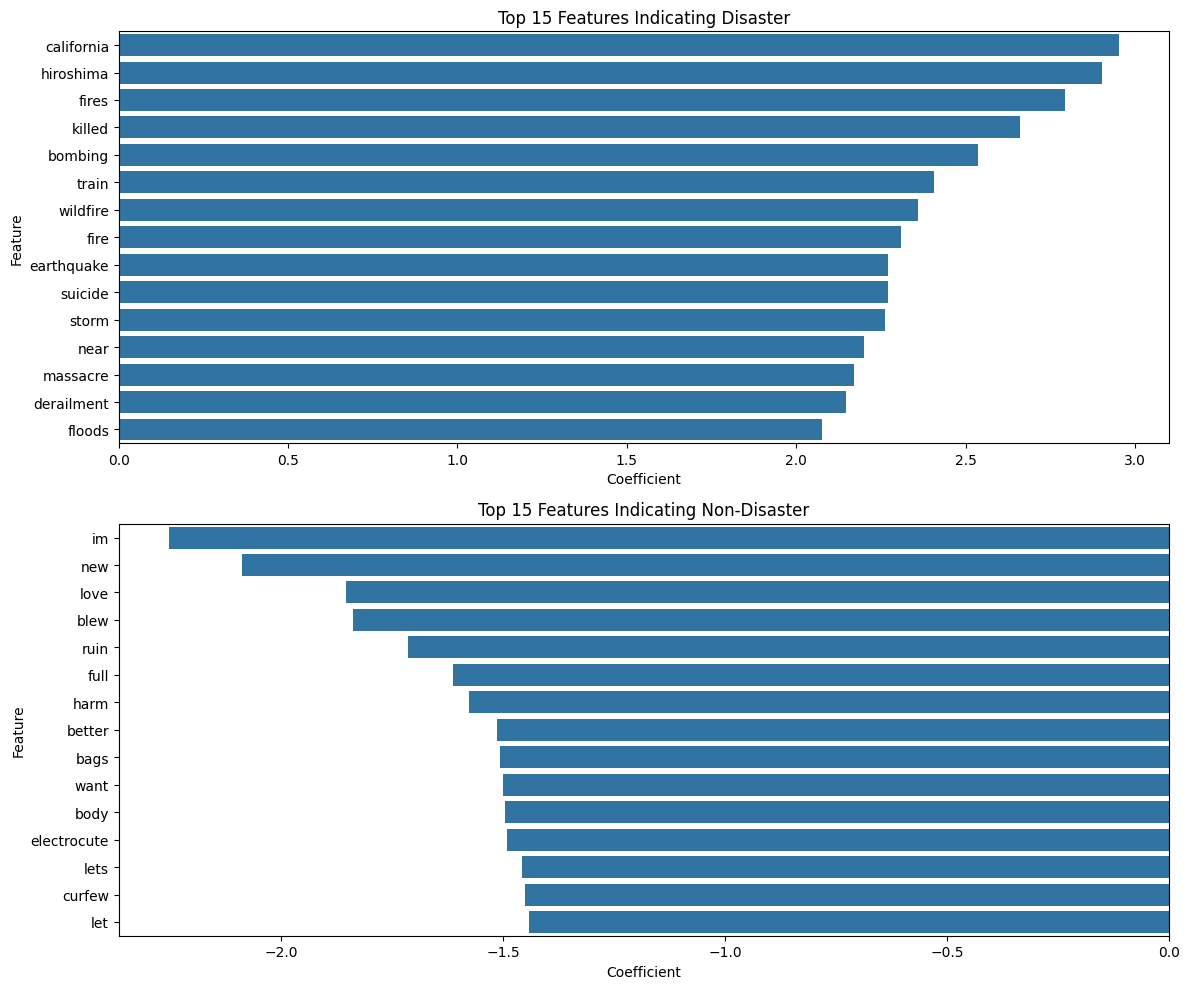


Random Forest Cross-validation F1 scores: [0.56686291 0.45777027 0.57503715 0.51018601 0.66666667]
Mean F1 score: 0.5553

Random Forest submission file created successfully!

Done! You can now submit either submission.csv (Logistic Regression) or rf_submission.csv (Random Forest)


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Make sure the competition data files are found
competition_path = '/content/'
train_path = os.path.join(competition_path, 'train.csv')
test_path = os.path.join(competition_path, 'test.csv')
submission_path = os.path.join(competition_path, 'sample_submission.csv')

print(f"\nChecking if competition files exist:")
print(f"Train file exists: {os.path.exists(train_path)}")
print(f"Test file exists: {os.path.exists(test_path)}")
print(f"Sample submission exists: {os.path.exists(submission_path)}")

# For text preprocessing - avoid NLTK downloads which can cause issues
# Define our own stopwords list instead
STOPWORDS = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
    'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

# Set random seed for reproducibility
np.random.seed(42)

# Load the data
try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    print("\nData loaded successfully!")
except Exception as e:
    print(f"\nError loading data: {e}")
    # If the competition path is wrong, try the default location
    train_df = pd.read_csv('../input/nlp-getting-started/train.csv')
    test_df = pd.read_csv('../input/nlp-getting-started/test.csv')
    print("Data loaded from default location.")

# Display basic information
print(f"\nTraining set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print("\nTraining set columns:", train_df.columns.tolist())
print("\nFirst few rows of training data:")
print(train_df.head())

# Check for missing values
print("\nMissing values in training set:")
print(train_df.isnull().sum())

# Basic EDA
print("\nTarget distribution:")
print(train_df['target'].value_counts())
print(train_df['target'].value_counts(normalize=True).round(3))

# Fill missing values
train_df['location'].fillna('unknown', inplace=True)
train_df['keyword'].fillna('unknown', inplace=True)
test_df['location'].fillna('unknown', inplace=True)
test_df['keyword'].fillna('unknown', inplace=True)

# Define text cleaning function
def clean_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # Remove user mentions and hashtags
        text = re.sub(r'@\w+|#\w+', '', text)

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        return text
    else:
        return ''

# Apply text cleaning
train_df['clean_text'] = train_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

# Visualize word counts in tweets
train_df['word_count'] = train_df['clean_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='word_count', hue='target', bins=30, kde=True)
plt.title('Word Count Distribution by Target')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(['Not Disaster', 'Disaster'])
plt.savefig('word_count_distribution.png')
plt.show()

# Most common keywords by disaster/not disaster
plt.figure(figsize=(12, 8))
disaster_keywords = train_df[train_df['target'] == 1]['keyword'].value_counts().head(15)
plt.subplot(1, 2, 1)
disaster_keywords.plot(kind='barh')
plt.title('Top Keywords in Disaster Tweets')
plt.xlabel('Count')

non_disaster_keywords = train_df[train_df['target'] == 0]['keyword'].value_counts().head(15)
plt.subplot(1, 2, 2)
non_disaster_keywords.plot(kind='barh')
plt.title('Top Keywords in Non-Disaster Tweets')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig('top_keywords.png')
plt.show()

# Feature Engineering with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Create the pipeline
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2),
                              stop_words=list(STOPWORDS))),
    ('clf', LogisticRegression(C=1, max_iter=1000, random_state=42))
])

# Cross-validation to check performance
cv_scores = cross_val_score(tfidf_pipeline, train_df['clean_text'],
                            train_df['target'], cv=5, scoring='f1')
print("\nCross-validation F1 scores:", cv_scores)
print(f"Mean F1 score: {cv_scores.mean():.4f}")

# Train the final model on all training data
tfidf_pipeline.fit(train_df['clean_text'], train_df['target'])

# Make predictions on the test set
tfidf_predictions = tfidf_pipeline.predict(test_df['clean_text'])

# Create the submission file
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'target': tfidf_predictions
})
submission_df.to_csv('submission.csv', index=False)
print("\nSubmission file created successfully!")

# Analyze feature importance
tfidf_vectorizer = tfidf_pipeline.named_steps['tfidf']
logistic_model = tfidf_pipeline.named_steps['clf']

# Get feature names and coefficients
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = logistic_model.coef_[0]

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display top features
print("\nTop 20 most important features:")
print(feature_importance.head(20))

# Plot top features
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(20)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Add a visualization for predictive words
# Get top positive and negative coefficient words
positive_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False).head(15)

negative_coef = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient').head(15)

# Plot
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
sns.barplot(x='Coefficient', y='Feature', data=positive_coef)
plt.title('Top 15 Features Indicating Disaster')
plt.tight_layout()

plt.subplot(2, 1, 2)
sns.barplot(x='Coefficient', y='Feature', data=negative_coef)
plt.title('Top 15 Features Indicating Non-Disaster')
plt.tight_layout()
plt.savefig('predictive_words.png')
plt.show()

# Add another model for comparison - Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for Random Forest
rf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000, ngram_range=(1, 2),
                              stop_words=list(STOPWORDS))),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_pipeline, train_df['clean_text'],
                              train_df['target'], cv=5, scoring='f1')
print("\nRandom Forest Cross-validation F1 scores:", rf_cv_scores)
print(f"Mean F1 score: {rf_cv_scores.mean():.4f}")

# Train the Random Forest model
rf_pipeline.fit(train_df['clean_text'], train_df['target'])

# Make predictions
rf_predictions = rf_pipeline.predict(test_df['clean_text'])

# Create another submission file
rf_submission_df = pd.DataFrame({
    'id': test_df['id'],
    'target': rf_predictions
})
rf_submission_df.to_csv('rf_submission.csv', index=False)
print("\nRandom Forest submission file created successfully!")

print("\nDone! You can now submit either submission.csv (Logistic Regression) or rf_submission.csv (Random Forest)")